In [10]:
import numpy as np
from bandit_class import Bandit
import matplotlib.pyplot as plt

In [71]:
BANDIT_MEANS = [1.5,2.4,3,3.3,3.5,4.2]

In [72]:
trials = 10000

In [73]:
bandits = []

for i in range(len(BANDIT_MEANS)):

    
    bandits.append(Bandit(BANDIT_MEANS[i],i+1))

In [74]:
def UCB1(mean,played,N):
    
    return mean + np.sqrt(2*np.log(N)/(played+1))

In [75]:
def experiment(bandits,trials):
    
    
    best=0
    
    rewards=[0]*trials
    
    optimal = np.argmax(BANDIT_MEANS)
    
    picked = [0]*len(bandits)
    
    
    for n in range(trials):
        
        
        i = np.argmax([UCB1(b.m,b.trials,n+1) for b in bandits])
        
        picked[i]+=1
        
        

    
        x = bandits[i].play()
        
        rewards[n] = x
            
        bandits[i].update(x)

    
    for b in bandits:
        print(f"estimated mean for machine {b.i} = {b.m_estimate}")
    
    cumulative_avg = np.cumsum(rewards)/(np.arange(trials)+1)
    
    for b in bandits:
        
        plt.plot(np.ones(trials)*b.m)
    
   
    
    plt.plot(cumulative_avg)
    
    plt.xscale('log')
    
    
    plt.show()
    
    for i in range(len(picked)):
        
        print(f"picked machine {i+1}, {picked[i]} times\n")
    
    print(f"the optimal machine number: {optimal+1}")

estimated mean for machine 1 = 2.7458511889670074
estimated mean for machine 2 = 2.441658830325767
estimated mean for machine 3 = 3.335930022318273
estimated mean for machine 4 = 3.7262935756663715
estimated mean for machine 5 = 3.3043509896602976
estimated mean for machine 6 = 4.176466970643377


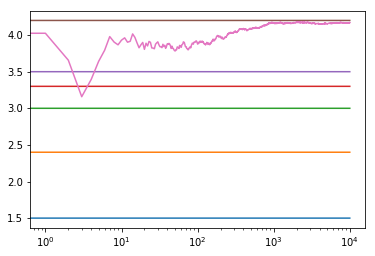

picked machine 1, 2 times

picked machine 2, 5 times

picked machine 3, 11 times

picked machine 4, 20 times

picked machine 5, 33 times

picked machine 6, 9929 times

the optimal machine number: 6


In [76]:
experiment(bandits,trials)